In [1]:
#Import libraries
import pandas as pd
import neattext.functions as nfx

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel


In [2]:
df=pd.read_csv('data/udemy_courses.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [4]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [5]:
#Cleaning the dataset by removing stopwords
df['clean_course_title']=df['course_title'].apply(nfx.remove_stopwords)

In [6]:
df['clean_course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678     Learn jQuery Scratch - Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681       CSS Animations: Create Amazing Effects Website
3682            MODX CMS Build Websites: Beginner's Guide
Name: clean_course_title, Length: 3683, dtype: object

In [7]:
#Cleaning the dataset by removing special characters
df['clean_course_title']=df['course_title'].apply(nfx.remove_special_characters)

In [8]:
df['clean_course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Your ...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro  Financial Analysis in Excel 2017
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch  Master of JavaScrip...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations Create Amazing Effects on Your ...
3682    Using MODX CMS to Build Websites A Beginners G...
Name: clean_course_title, Length: 3683, dtype: object

In [9]:
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Your ...
2,Financial Modeling for Business Analysts and C...,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner to Pro Financial Analysis in Excel 2017
4,How To Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery from Scratch Master of JavaScrip...
3679,How To Design A WordPress Website With No Codi...,How To Design A WordPress Website With No Codi...
3680,Learn and Build using Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects on Your ...


In [10]:
#Vectorize and transform the course title column to a matrix

count_vect=CountVectorizer()
cv_mat=count_vect.fit_transform(df['clean_course_title'])
cv_mat

<3683x3680 sparse matrix of type '<class 'numpy.int64'>'
	with 23448 stored elements in Compressed Sparse Row format>

In [11]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
df_cv_words=pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())
#df_cv_words=pd.DataFrame(cv_mat.todense())

In [13]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#cosine similarity
#Content filtering 

import seaborn as sns
cosine_sim_mat=cosine_similarity(cv_mat)



In [15]:
cosine_sim_mat

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16903085, ..., 1.        , 0.        ,
        0.31622777],
       [0.        , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 0.        ,
        1.        ]])

<AxesSubplot:>

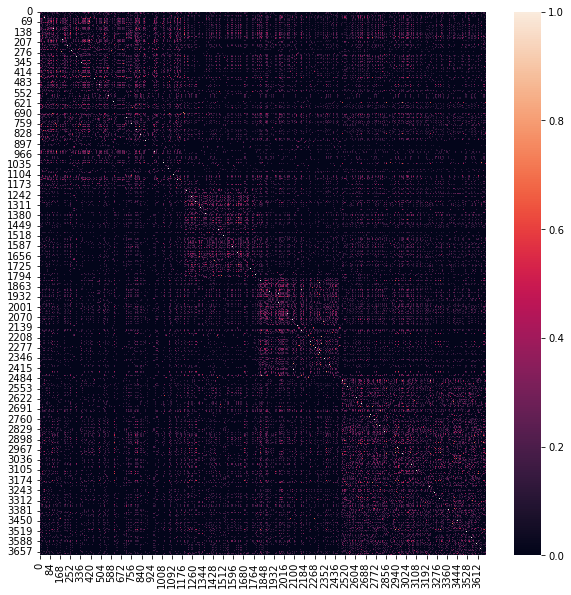

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cosine_sim_mat,vmin=0, vmax=1)


In [17]:
#Extract clean course title
course_indices=pd.Series(df.index,index=df['clean_course_title']).drop_duplicates()

In [18]:
course_indices

clean_course_title
Ultimate Investment Banking Course                              0
Complete GST Course  Certification  Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants        2
Beginner to Pro  Financial Analysis in Excel 2017               3
How To Maximize Your Profits Trading Options                    4
                                                             ... 
Learn jQuery from Scratch  Master of JavaScript library      3678
How To Design A WordPress Website With No Coding At All      3679
Learn and Build using Polymer                                3680
CSS Animations Create Amazing Effects on Your Website        3681
Using MODX CMS to Build Websites A Beginners Guide           3682
Length: 3683, dtype: int64

In [19]:
#Choose the course for which you want recommendations
idx=course_indices['Ultimate Investment Banking Course']

In [20]:
idx

0

In [21]:
#Extract scores for the recommended courses
scores=list(enumerate(cosine_sim_mat[idx]))

In [22]:
scores

[(0, 1.0),
 (1, 0.17677669529663687),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.16666666666666666),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.16666666666666666),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.17677669529663687),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.15811388300841897),
 (25, 0.0),
 (26, 0.16666666666666666),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.14433756729740646),
 (33, 0.0),
 (34, 0.20412414523193154),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.6123724356957946),
 (40, 0.20412414523193154),
 (41, 0.1889822365046136),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.17677669529663687),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.15811388300841897),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),


In [23]:
dfn=pd.DataFrame(scores)


In [24]:
dfn.columns = ['Index','Scores']

In [25]:
#Create Scores DataFrame with Index
dfn

,Index,Scores
0,0,1.000000
1,1,0.176777
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
3678,3678,0.000000
3679,3679,0.000000
3680,3680,0.000000
3681,3681,0.000000


In [26]:
course_indices_df=pd.DataFrame(df['clean_course_title']).drop_duplicates()

In [27]:
course_indices_df

,clean_course_title
0,Ultimate Investment Banking Course
1,Complete GST Course Certification Grow Your ...
2,Financial Modeling for Business Analysts and C...
3,Beginner to Pro Financial Analysis in Excel 2017
4,How To Maximize Your Profits Trading Options
...,...
3678,Learn jQuery from Scratch Master of JavaScrip...
3679,How To Design A WordPress Website With No Codi...
3680,Learn and Build using Polymer
3681,CSS Animations Create Amazing Effects on Your ...


In [28]:
#Drop rows with null columns in course_incdices dataframe and merge the new dataset with columns 
#clean_course_titles,Scores and Index
course_indices_df.dropna()
new_df=course_indices_df.assign(Scores=dfn['Scores'],Index=dfn['Index'])

In [29]:
new_df

,clean_course_title,Scores,Index
0,Ultimate Investment Banking Course,1.000000,0
1,Complete GST Course Certification Grow Your ...,0.176777,1
2,Financial Modeling for Business Analysts and C...,0.000000,2
3,Beginner to Pro Financial Analysis in Excel 2017,0.000000,3
4,How To Maximize Your Profits Trading Options,0.000000,4
...,...,...,...
3678,Learn jQuery from Scratch Master of JavaScrip...,0.000000,3678
3679,How To Design A WordPress Website With No Codi...,0.000000,3679
3680,Learn and Build using Polymer,0.000000,3680
3681,CSS Animations Create Amazing Effects on Your ...,0.000000,3681


In [30]:
#Sort the recommendation score ranking from highest to lowest.The highest ranked course will be the 
#most recommended course
new_df=new_df.sort_values(by=['Scores'], ascending=False)

In [31]:
new_df

,clean_course_title,Scores,Index
0,Ultimate Investment Banking Course,1.000000,0
39,The Complete Investment Banking Course 2017,0.612372,39
3479,The Ultimate jQuery Course,0.500000,3479
2807,Ultimate WordPress Plugin Course,0.500000,2807
2719,The Ultimate Web Development Course,0.447214,2719
...,...,...,...
1320,Illustrator Creating stylised images from a p...,0.000000,1320
1322,Convirtete en un experto de photoshop cc naked...,0.000000,1322
1323,CORSO COMPLETO DI EON VUE XSTREAM PER TUTTI,0.000000,1323
1324,Illustrator,0.000000,1324


In [32]:
new_df.reset_index(drop=True, inplace=True)

In [33]:
new_df

,clean_course_title,Scores,Index
0,Ultimate Investment Banking Course,1.000000,0
1,The Complete Investment Banking Course 2017,0.612372,39
2,The Ultimate jQuery Course,0.500000,3479
3,Ultimate WordPress Plugin Course,0.500000,2807
4,The Ultimate Web Development Course,0.447214,2719
...,...,...,...
3637,Illustrator Creating stylised images from a p...,0.000000,1320
3638,Convirtete en un experto de photoshop cc naked...,0.000000,1322
3639,CORSO COMPLETO DI EON VUE XSTREAM PER TUTTI,0.000000,1323
3640,Illustrator,0.000000,1324


In [34]:
#Convert new DataFrame to list of tuples/records
dfn.to_records(index=False)
sorted_scores=list(new_df.to_records(index=False))

In [35]:
sorted_scores

[('Ultimate Investment Banking Course', 1., 0),
 ('The Complete Investment Banking Course 2017', 0.61237244, 39),
 ('The Ultimate jQuery Course', 0.5, 3479),
 ('Ultimate WordPress Plugin Course', 0.5, 2807),
 ('The Ultimate Web Development Course', 0.4472136, 2719),
 ('The Investment Banking Recruitment Series', 0.4472136, 419),
 ('Advanced Accounting for Investment Banking', 0.4472136, 242),
 ('Financial Accounting  The Ultimate Beginner Course', 0.40824829, 659),
 ('Managerial Accounting  The Ultimate Beginner Course', 0.40824829, 1073),
 ('The Ultimate Vue JS 2 Developers Course', 0.40824829, 2648),
 ('PHP with PDO  ULTIMATE Crash Course', 0.40824829, 3015),
 ('Cryptocurrency BTC  ETH Investment  Trading Course 2017', 0.37796447, 457),
 ('Bitcoin  Ethereum Course 2 Course Bundle', 0.37796447, 640),
 ('The Ultimate Drawing Course  Beginner to Advanced', 0.37796447, 1215),
 ('Ultimate CSS3 Course  From Beginners To Professional', 0.37796447, 3008),
 ('Investment Banking Operations  Se

In [36]:
sorted_scores[1:]

[('The Complete Investment Banking Course 2017', 0.61237244, 39),
 ('The Ultimate jQuery Course', 0.5, 3479),
 ('Ultimate WordPress Plugin Course', 0.5, 2807),
 ('The Ultimate Web Development Course', 0.4472136, 2719),
 ('The Investment Banking Recruitment Series', 0.4472136, 419),
 ('Advanced Accounting for Investment Banking', 0.4472136, 242),
 ('Financial Accounting  The Ultimate Beginner Course', 0.40824829, 659),
 ('Managerial Accounting  The Ultimate Beginner Course', 0.40824829, 1073),
 ('The Ultimate Vue JS 2 Developers Course', 0.40824829, 2648),
 ('PHP with PDO  ULTIMATE Crash Course', 0.40824829, 3015),
 ('Cryptocurrency BTC  ETH Investment  Trading Course 2017', 0.37796447, 457),
 ('Bitcoin  Ethereum Course 2 Course Bundle', 0.37796447, 640),
 ('The Ultimate Drawing Course  Beginner to Advanced', 0.37796447, 1215),
 ('Ultimate CSS3 Course  From Beginners To Professional', 0.37796447, 3008),
 ('Investment Banking Operations  Securities Trade Life Cycle', 0.37796447, 724),
 (

In [37]:
#Remove all attributes from the list of tuples and notice them separately

In [38]:
selected_course_indices=[i[2] for i in sorted_scores[1:]]

In [39]:
selected_course_indices

[39,
 3479,
 2807,
 2719,
 419,
 242,
 659,
 1073,
 2648,
 3015,
 457,
 640,
 1215,
 3008,
 724,
 3238,
 229,
 2505,
 139,
 948,
 3662,
 3569,
 3529,
 420,
 452,
 805,
 738,
 1365,
 1819,
 3093,
 506,
 3428,
 2046,
 1992,
 2372,
 2442,
 371,
 356,
 299,
 2981,
 208,
 2048,
 857,
 524,
 3363,
 3261,
 3244,
 728,
 733,
 166,
 2943,
 866,
 3199,
 2958,
 2736,
 2680,
 3059,
 2543,
 2508,
 3079,
 2242,
 2085,
 2075,
 126,
 1904,
 1897,
 1745,
 1628,
 1584,
 1392,
 2814,
 3095,
 1363,
 1849,
 3431,
 2915,
 795,
 2201,
 2563,
 115,
 1662,
 1963,
 2180,
 122,
 1887,
 3635,
 836,
 3445,
 2601,
 1220,
 892,
 413,
 2095,
 2905,
 264,
 2644,
 1178,
 34,
 1867,
 1174,
 3525,
 1152,
 1820,
 194,
 183,
 2708,
 40,
 2003,
 2741,
 527,
 1371,
 3669,
 3250,
 2446,
 1292,
 3237,
 713,
 3291,
 2491,
 530,
 2514,
 3038,
 2743,
 2364,
 2395,
 766,
 2524,
 437,
 1118,
 3120,
 1161,
 2840,
 2026,
 3231,
 2833,
 951,
 1807,
 2684,
 646,
 3213,
 41,
 2626,
 2317,
 3091,
 3359,
 2557,
 164,
 1261,
 2977,
 3058,


In [40]:
selected_course_scores=[i[1] for i in sorted_scores[1:]]

In [41]:
selected_course_scores

[0.6123724356957946,
 0.5,
 0.5,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.35355339059327373,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.22360679774997896,
 0.

In [42]:
selected_course_titles=[i[0] for i in sorted_scores[1:]]

In [43]:
#Ranking from most recommended to least recommended course titles
selected_course_titles

['The Complete Investment Banking Course 2017',
 'The Ultimate jQuery Course',
 'Ultimate WordPress Plugin Course',
 'The Ultimate Web Development Course',
 'The Investment Banking Recruitment Series',
 'Advanced Accounting for Investment Banking',
 'Financial Accounting  The Ultimate Beginner Course',
 'Managerial Accounting  The Ultimate Beginner Course',
 'The Ultimate Vue JS 2 Developers Course',
 'PHP with PDO  ULTIMATE Crash Course',
 'Cryptocurrency BTC  ETH Investment  Trading Course 2017',
 'Bitcoin  Ethereum Course 2 Course Bundle',
 'The Ultimate Drawing Course  Beginner to Advanced',
 'Ultimate CSS3 Course  From Beginners To Professional',
 'Investment Banking Operations  Securities Trade Life Cycle',
 'Ultimate Web Designer  Developer Course Build 23 Projects',
 'Investment Banking How to Land a Job on Wall Street',
 'Ultimate Web Developer Course Build 10 Websites from Scratch',
 'Intro to Investment Banking MA IPO Modeling  Free Book',
 'Triple P Trading Course',
 'Ultim